# 복습 matplot을 이용한 img 출력

(342, 342, 3)


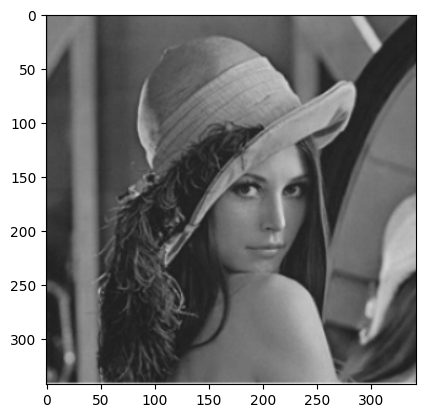

In [2]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

src= img.imread("lenna.jpg")
print(src.shape)
plt.imshow(src)
plt.show()

# 덧셈 연산 및 뺄셈 연산(밝기)
# 곱셈 연산 및 나눗셈 연산(명암대비)

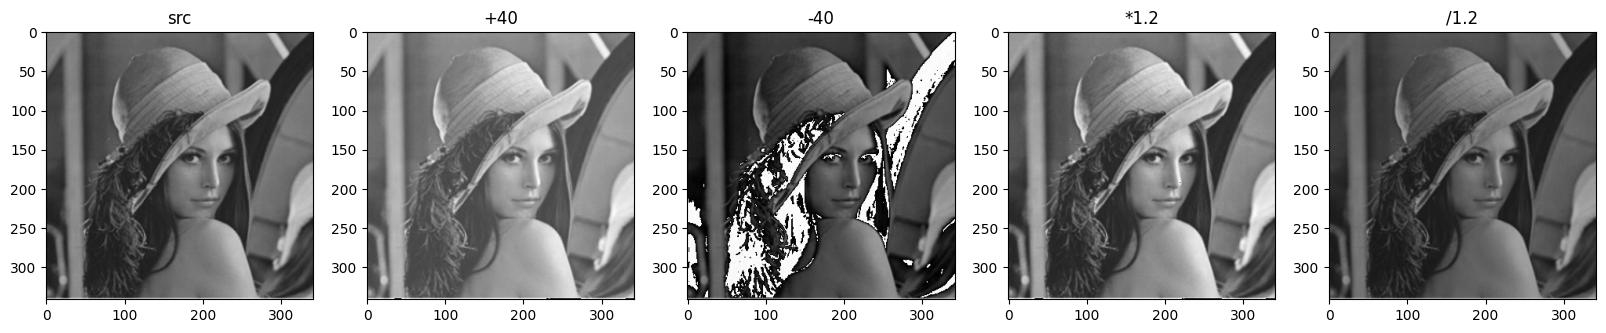

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
axes[0].imshow(src)
axes[0].set_title('src')
axes[1].imshow(src+40)
axes[1].set_title('+40')
axes[2].imshow(src-40)
axes[2].set_title('-40')
axes[3].imshow((src*1.2).astype(np.uint8))
axes[3].set_title('*1.2')
axes[4].imshow((src/1.2).astype(np.uint8))
axes[4].set_title('/1.2')

plt.show()

# np.where 조건 만족 인덱스 반환

In [3]:
# src = np.random.randint(low=0, high=10, size=(5,5))
src= img.imread("lenna.jpg")[:,:,1]

print(src)
np.where(src==6)

[[ 82 113 128 ...  58  49  43]
 [ 82 113 128 ...  48  42  38]
 [ 82 113 129 ...  39  37  36]
 ...
 [ 55  79  89 ... 165 157 150]
 [103 120 127 ... 187 182 178]
 [181 191 194 ... 224 222 219]]


(array([], dtype=int64), array([], dtype=int64))

# 히스토그램 평활화
- 기존 영상의 명암 값 분포를 재분배하여 일정한 분포를 가진 히스토그램을 생성

## 1.히스토그램 평활화 명암값의 j의 빈도수를 계산

In [4]:
# hist =np.zeros(255)
# count = 0
# for px in range(256):
#     np.where(src==px)
#     count += 1
#     hist[px] = count

# print(hist)


hist = np.zeros(256)
for px in range(256):    
    hist[px]= (src==px).sum()
print(hist)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 2.000e+01
 4.500e+01 7.100e+01 1.380e+02 3.980e+02 8.480e+02 1.367e+03 1.967e+03
 2.294e+03 2.423e+03 2.155e+03 1.854e+03 1.464e+03 1.308e+03 1.121e+03
 9.350e+02 8.740e+02 8.170e+02 7.890e+02 8.380e+02 8.190e+02 8.380e+02
 7.990e+02 8.250e+02 8.190e+02 7.130e+02 6.160e+02 6.640e+02 6.340e+02
 6.240e+02 6.360e+02 6.220e+02 6.880e+02 6.750e+02 6.860e+02 6.510e+02
 6.740e+02 7.270e+02 7.620e+02 8.780e+02 8.840e+02 9.790e+02 1.070e+03
 1.069e+03 1.051e+03 8.740e+02 7.520e+02 7.650e+02 6.890e+02 6.060e+02
 6.980e+02 5.930e+02 6.360e+02 7.130e+02 7.140e+02 6.840e+02 6.570e+02
 6.800e+02 6.740e+02 6.960e+02 7.040e+02 7.230e+02 7.020e+02 7.060e+02
 7.190e+02 7.160e+02 7.880e+02 7.890e+02 8.540e+02 8.750e+02 9.180e+02
 1.098

## 2. 빈도수의 누적 값을 계산

In [5]:
hist_cum =np.zeros(256)
for px in range(256):    
    hist_cum[px]= (src<=px).sum()
print(hist_cum)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 2.00000e+00 4.00000e+00 2.40000e+01 6.90000e+01 1.40000e+02
 2.78000e+02 6.76000e+02 1.52400e+03 2.89100e+03 4.85800e+03 7.15200e+03
 9.57500e+03 1.17300e+04 1.35840e+04 1.50480e+04 1.63560e+04 1.74770e+04
 1.84120e+04 1.92860e+04 2.01030e+04 2.08920e+04 2.17300e+04 2.25490e+04
 2.33870e+04 2.41860e+04 2.50110e+04 2.58300e+04 2.65430e+04 2.71590e+04
 2.78230e+04 2.84570e+04 2.90810e+04 2.97170e+04 3.03390e+04 3.10270e+04
 3.17020e+04 3.23880e+04 3.30390e+04 3.37130e+04 3.44400e+04 3.52020e+04
 3.60800e+04 3.69640e+04 3.79430e+04 3.90130e+04 4.00820e+04 4.11330e+04
 4.20070e+04 4.27590e+04 4.35240e+04 4.42130e+04 4.48190e+04 4.55170e+04
 4.61100e+04 4.67460e+04 4.74590e+04 4.81730e+04 4.

## 3.누적 값을 정규화

In [6]:
norm = np.zeros(256)
for px in range(256):    
    # norm[px]= hist_cum[px] // (src.shape[0]*src.shape[1]) *255
    norm[px]= hist_cum[px] / (src.shape[0]*src.shape[1]) *255
print(norm)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.18015800e-03 4.36031599e-03 8.72063199e-03 5.23237919e-02
 1.50430902e-01 3.05222120e-01 6.06083923e-01 1.47378681e+00
 3.32256079e+00 6.30283677e+00 1.05912076e+01 1.55924900e+01
 2.08750128e+01 2.55732533e+01 2.96152662e+01 3.28070175e+01
 3.56586642e+01 3.81026213e+01 4.01410690e+01 4.20465271e+01
 4.38277162e+01 4.55478609e+01 4.73748333e+01 4.91603827e+01
 5.09873551e+01 5.27293013e+01 5.45279317e+01 5.63134811e+01
 5.78679337e+01 5.92109110e+01 6.06585360e+01 6.20407561e+01
 6.34011747e+01 6.47877552e+01 6.61438135e+01 6.76437622e+01
 6.91153688e+01 7.06109572e+01 7.20302401e+01 7.34996666e+01
 7.50846414e+01 7.674592

## 4. 픽셀값 변환

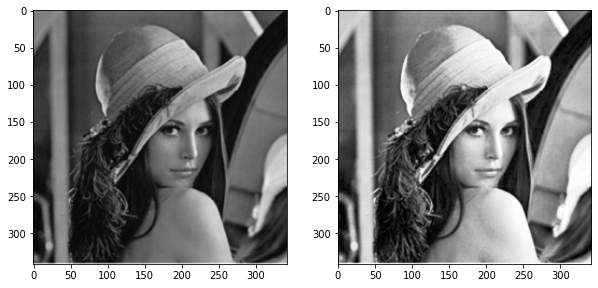

In [7]:
dst = np.zeros_like(src)
for px in range(256):
    dst[src == px] = norm[px]
    
dst = dst.astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[1].imshow(dst, cmap = 'gray')

# 이미지의 크기를 출력 shape

In [8]:
dst.shape #사진의 h,w 사이즈

(342, 342)

# 복습 히스토그램 평활화 한번에 하기

[[ 71  46  55 ...  37  75 149]
 [ 52  24  28 ...  39  72 144]
 [ 51  20  21 ...  43  69 139]
 ...
 [104  32  24 ...  31  31  76]
 [106  47  38 ...  55  64  97]
 [148  91  84 ... 124 133 165]]
[1.700e+01 1.580e+02 5.750e+02 1.160e+03 1.877e+03 2.364e+03 2.767e+03
 3.037e+03 3.086e+03 3.347e+03 3.506e+03 3.535e+03 3.574e+03 3.295e+03
 3.158e+03 3.019e+03 2.681e+03 2.435e+03 2.243e+03 1.948e+03 1.796e+03
 1.610e+03 1.421e+03 1.293e+03 1.201e+03 1.080e+03 9.960e+02 9.400e+02
 8.160e+02 7.850e+02 6.790e+02 6.570e+02 6.720e+02 5.800e+02 5.520e+02
 5.380e+02 4.350e+02 4.180e+02 3.330e+02 3.280e+02 3.070e+02 2.870e+02
 2.460e+02 2.120e+02 2.010e+02 1.810e+02 1.800e+02 1.660e+02 1.430e+02
 1.510e+02 1.270e+02 1.090e+02 9.600e+01 9.500e+01 8.800e+01 8.700e+01
 8.700e+01 7.600e+01 7.000e+01 7.100e+01 6.100e+01 4.300e+01 3.100e+01
 3.300e+01 3.500e+01 3.000e+01 2.200e+01 1.900e+01 1.700e+01 1.400e+01
 7.000e+00 9.000e+00 6.000e+00 1.200e+01 4.000e+00 1.300e+01 1.300e+01
 1.400e+01 2.100e+01 1.200e

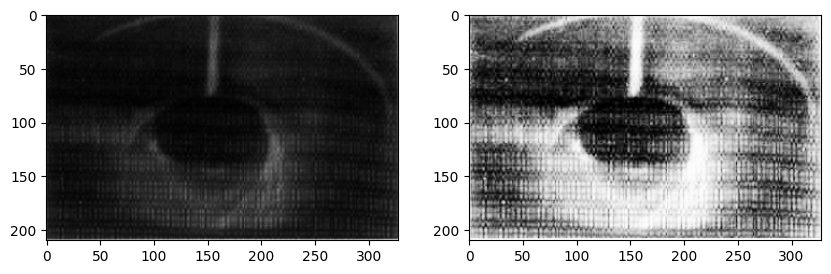

In [4]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

src= img.imread("dark.jpg")[:,:,1]

print(src)
np.where(src==6)

hist = np.zeros(256)
for px in range(256):    
    hist[px]= (src==px).sum()
print(hist)

hist_cum =np.zeros(256)
for px in range(256):    
    hist_cum[px]= (src<=px).sum()
print(hist_cum)

norm = np.zeros(256)
for px in range(256):    
    # norm[px]= hist_cum[px] // (src.shape[0]*src.shape[1]) *255
    norm[px]= hist_cum[px] / (src.shape[0]*src.shape[1]) *255
print(norm)

dst = np.zeros_like(src)
for px in range(256):
    dst[src == px] = norm[px]
    
dst = dst.astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[1].imshow(dst, cmap = 'gray')


# CV2를 이용한 히스토그램 평활화

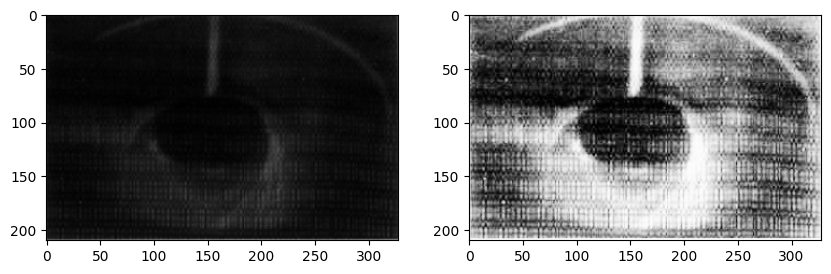

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dark.jpg')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.waitKey(0)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(img, cmap = 'gray') 
axes[1].imshow(img_output, cmap = 'gray')

In [6]:
import cv2
import numpy as np

img = cv2.imread('dark.jpg')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Color input image', img)
cv2.imshow('Histogram equalized', img_output)

cv2.waitKey(0)

-1

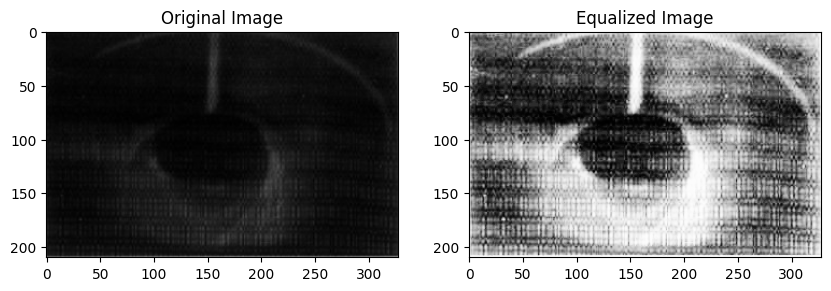

In [7]:
import cv2
import matplotlib.pyplot as plt

# Read input image using OpenCV
src_cv2 = cv2.imread('dark.jpg')

# Convert image to grayscale and perform histogram equalization
equalized_image = cv2.equalizeHist(cv2.cvtColor(src_cv2, cv2.COLOR_BGR2GRAY))

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src_cv2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()

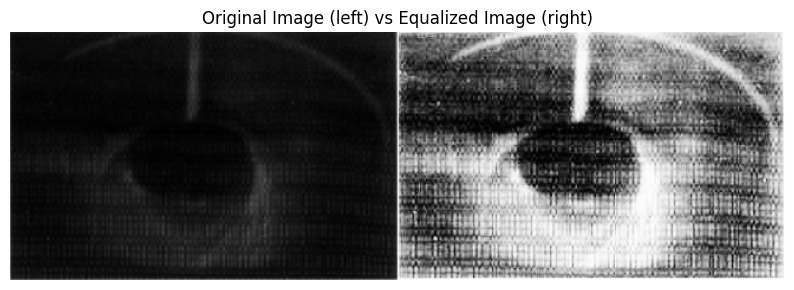

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input image using OpenCV
src_cv2 = cv2.imread('dark.jpg')

# Convert image to grayscale and perform histogram equalization
gray_image = cv2.cvtColor(src_cv2, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# Convert equalized image to color for stacking
clahe_color = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)

# Horizontally stack original and equalized images
hstack_image = np.hstack((cv2.cvtColor(src_cv2, cv2.COLOR_BGR2RGB), clahe_color))

# Display original and equalized images using plt.imshow()
plt.figure(figsize=(10, 5))
plt.imshow(hstack_image)
plt.title('Original Image (left) vs Equalized Image (right)')
plt.axis('off')
plt.show()

# clahe 
-  이미지 처리에 사용되는 기존 히스토그램 균등화(HE) 방법을 개선한 것입니다

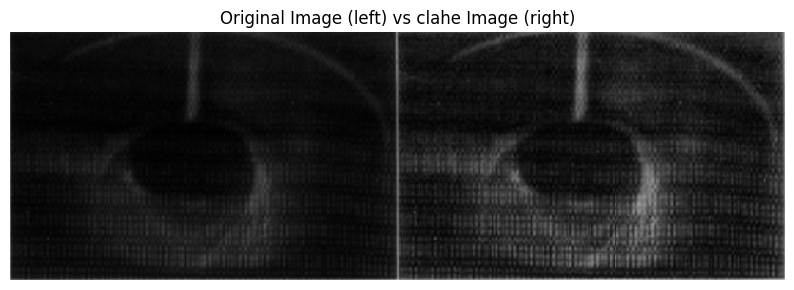

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input image using OpenCV
src_cv2 = cv2.imread('dark.jpg')

# Convert image to grayscale
gray_image = cv2.cvtColor(src_cv2, cv2.COLOR_BGR2GRAY)

# Create a CLAHE object (Arguments are optional and can be tuned)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(gray_image)

# Convert equalized image to color for stacking
clahe_color = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)

# Horizontally stack original and equalized images
hstack_image = np.hstack((cv2.cvtColor(src_cv2, cv2.COLOR_BGR2RGB), clahe_color))

# Display original and equalized images using plt.imshow()
plt.figure(figsize=(10, 5))
plt.imshow(hstack_image)
plt.title('Original Image (left) vs clahe Image (right)')
plt.axis('off')
plt.show()

# Stretche
- 명암대비 스트레칭 : 모든 범위의 화소 값을 포함하도록 확장

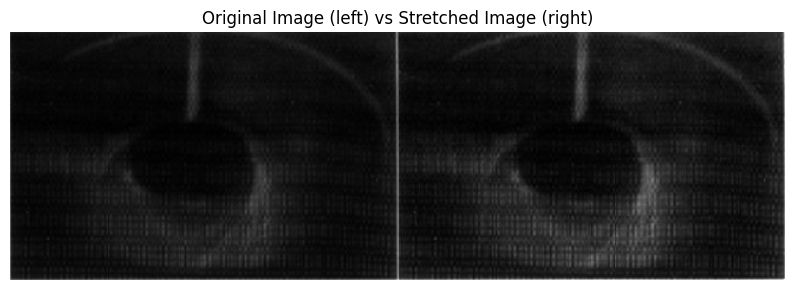

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input image using OpenCV
src_cv2 = cv2.imread('dark.jpg')

# Convert image to grayscale
gray_image = cv2.cvtColor(src_cv2, cv2.COLOR_BGR2GRAY)

# Perform contrast stretching (min-max normalization)
min_val = np.min(gray_image)
max_val = np.max(gray_image)
stretched_image = np.uint8((gray_image - min_val) * (255.0 / (max_val - min_val)))

# Convert stretched image to color for stacking
stretched_image_color = cv2.cvtColor(stretched_image, cv2.COLOR_GRAY2RGB)

# Horizontally stack original and stretched images
hstack_image = np.hstack((cv2.cvtColor(src_cv2, cv2.COLOR_BGR2RGB), stretched_image_color))

# Display original and stretched images using plt.imshow()
plt.figure(figsize=(10, 5))
plt.imshow(hstack_image)
plt.title('Original Image (left) vs Stretched Image (right)')
plt.axis('off')
plt.show()

# 원본,평활화,스크레치

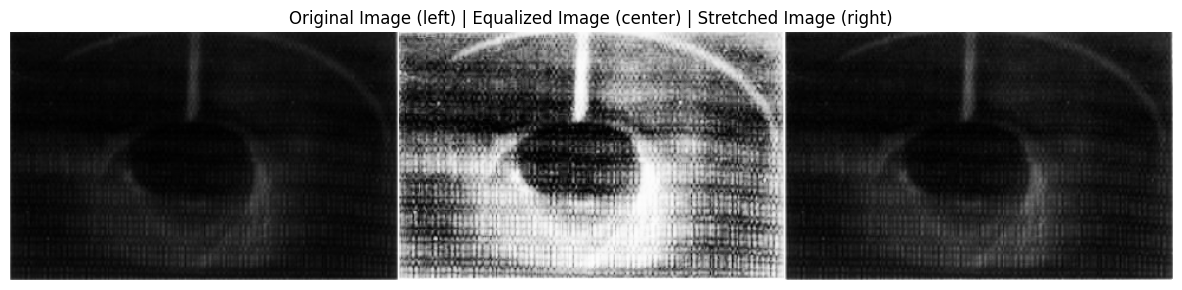

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input image using OpenCV
src_cv2 = cv2.imread('dark.jpg')

# Convert image to grayscale
gray_image = cv2.cvtColor(src_cv2, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Perform contrast stretching (min-max normalization)
min_val = np.min(gray_image)
max_val = np.max(gray_image)
stretched_image = np.uint8((gray_image - min_val) * (255.0 / (max_val - min_val)))

# Convert equalized and stretched images to color for stacking
clahe_color = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)
stretched_image_color = cv2.cvtColor(stretched_image, cv2.COLOR_GRAY2RGB)

# Horizontally stack original, equalized, and stretched images
hstack_image = np.hstack((cv2.cvtColor(src_cv2, cv2.COLOR_BGR2RGB), clahe_color, stretched_image_color))

# Display original, equalized, and stretched images using plt.imshow()
plt.figure(figsize=(15, 5))
plt.imshow(hstack_image)
plt.title('Original Image (left) | Equalized Image (center) | Stretched Image (right)')
plt.axis('off')
plt.show()

# binary 이진화
- 잡음제거에 이용

# 내가 코드 짜본것

Time:0.21600008010864258


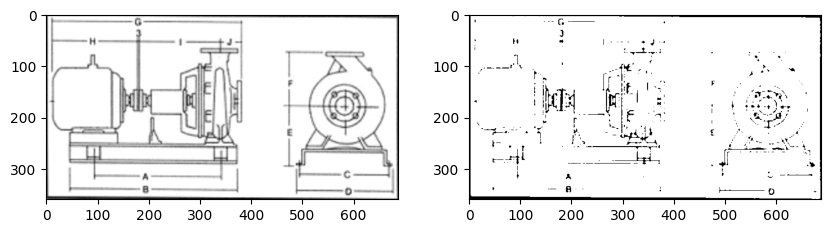

In [1]:
import cv2 # 0 ~ 255
import matplotlib.pyplot as plt
import numpy as np
import time

s_time =time.time()
src= cv2.imread("scan.jpg",0)
h,w = src.shape

dst = np.zeros_like(src)

T = 150

for i in range(h):
    for j in range(w):
        if src[i,j] >= T:
            dst[i,j] = 255
        else:
            dst[i,j] = 0

print(f"Time:{time.time() - s_time}")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[1].imshow(dst, cmap = 'gray')
plt.show()

# 교수님이 축약하신 코드

Time:0.012000083923339844


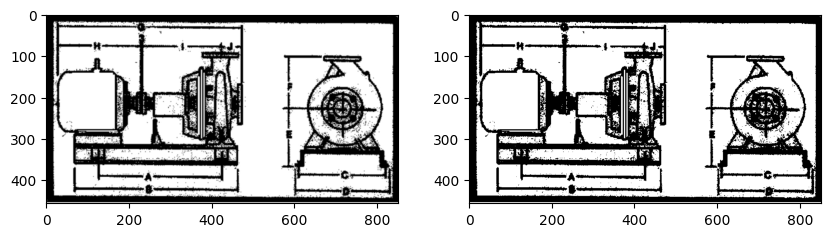

In [4]:
import cv2 # 0 ~ 255
import matplotlib.pyplot as plt
import numpy as np
import time

s_time =time.time()
src= cv2.imread("scan_1.jpg",0)
h,w = src.shape

dst = np.zeros_like(src)

T = 150

dst[src>=T] = 255

print(f"Time:{time.time() - s_time}")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[1].imshow(dst, cmap = 'gray')
plt.show()

# np.where 사용

Time:0.012000560760498047


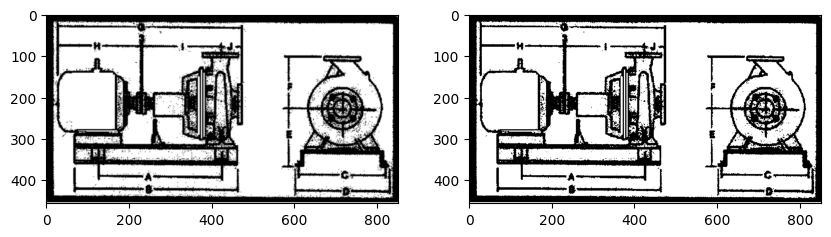

In [3]:
import cv2 # 0 ~ 255
import matplotlib.pyplot as plt
import numpy as np
import time

s_time =time.time()
src= cv2.imread("scan_1.jpg",0)
h,w = src.shape

T = 100
dst = np.where(src >= T, 255,0) # 100 이상인 영역은 흰색, 100 이하인 영역은 검정색으로 나타남


print(f"Time:{time.time() - s_time}")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[1].imshow(dst, cmap = 'gray')
plt.show()

# 덧셈 연산
- 영상을 합칠때( fade in, fade out)

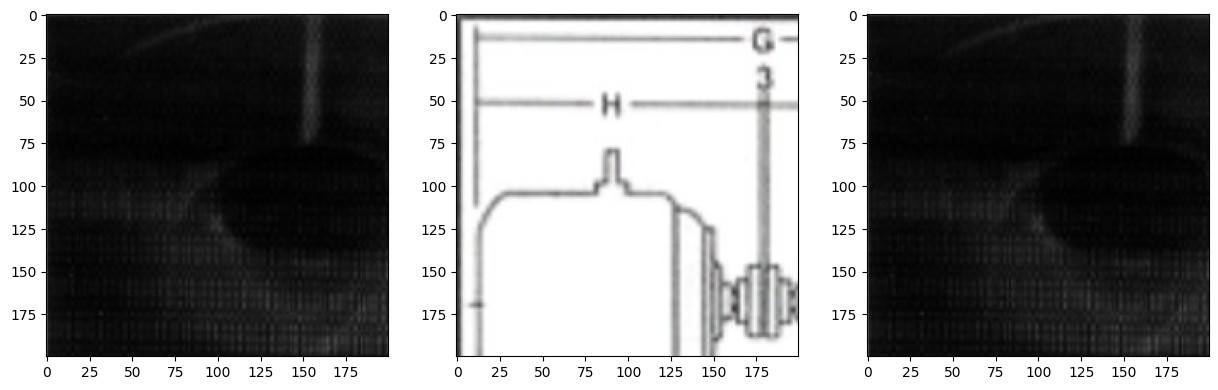

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

H = 200
src1 = cv2.imread('dark.jpg')
src1 = src1[:H,:H]
src2 = cv2.imread('scan.jpg')
src2 = src2[:H,:H]

alphas = np.arange(11) * 0.1 # 0부터 1까지 0.1씩 증가하는 값들로 이루어진 배열을 생성한다
cv2.namedWindow('Result')
for alpha in alphas:
    final = alpha*src1 + (1-alpha)*src2 # 비율에 따라 이미지를 섞는다
    final= final.astype(np.uint8)
    imgs = [src1, src2, final] # 생성된 이미지를 리스트에 저장

fig,axes = plt.subplots(1, len(imgs), figsize=(15,5))

for i, ax in enumerate(axes):
    ax.imshow(imgs[i][:,:,::-1])
plt.show()

## fade in 처럼 만들어보기

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

H = 200
src1 = cv2.imread('dark.jpg',0)
src1 = src1[:H,:H]
src2 = cv2.imread('scan.jpg',0)
src2 = src2[:H,:H]

alphas = np.linspace(0,1,100,endpoint=True) # 0과 1 사이에 균일한 간격의 값을 100개 생성
cv2.namedWindow('Result')
for alpha in alphas:
    final = alpha*src1 + (1-alpha)*src2
    final= final.astype(np.uint8)
    cv2.imshow('Result',final)
    cv2.waitKey(10)
    
cv2.destroyAllWindows()

## 뺄셈 연산
- 주로 기존영상과의 차이를 비교할때 사용

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

H = 150
src1 = cv2.imread('minus_1.jpg',0)
src1 = src1[:H,:H]
src2 = cv2.imread('minus_2.jpg',0)
src2 = src2[:H,:H]


cv2.namedWindow('Result')

final = src1 - src2
print(final.mean())
final= final.astype(np.uint8)
cv2.imshow('Result',final)
cv2.waitKey(0) # 계속 기다림 직접 지워지기 전까지

cv2.destroyAllWindows()

135.4027111111111
